In [32]:
import os
import zipfile
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
# using wget

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

In [2]:
# using python code

def get_path(os_type):
    if os_type == 'windows':
        filename = "D:\\Sandbox\\GitHub\\DATA\\"   # windows
    else:
        filename = "/content/"  # unix
    return(filename)

In [3]:
os = 'windows'
filepath = get_path(os)

file = 'rps.zip'

URL = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip"

zip_file = tf.keras.utils.get_file(origin=URL,
                                   fname=filepath+file,
                                   extract=True)

200687616/200682221 [==============================] - 22s 0us/step


In [4]:

file = 'rps-test-set.zip'

URL = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip"

zip_file = tf.keras.utils.get_file(origin=URL,
                                   fname=filepath+file,
                                   extract=True)

29523968/29516758 [==============================] - 4s 0us/step


In [5]:
import os
import zipfile

local_zip = filepath + 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(filepath)
zip_ref.close()

local_zip = filepath + 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(filepath)
zip_ref.close()

In [6]:
rock_dir = os.path.join(filepath + 'rps/rock')
paper_dir = os.path.join(filepath + 'rps/paper')
scissors_dir = os.path.join(filepath + 'rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


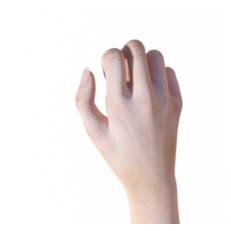

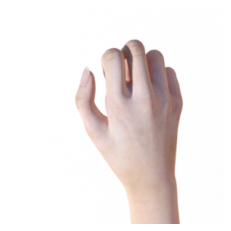

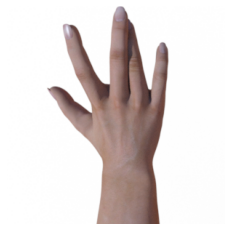

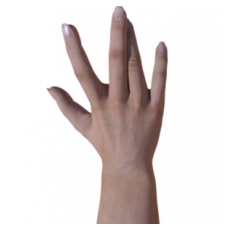

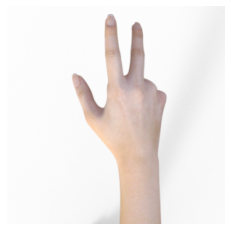

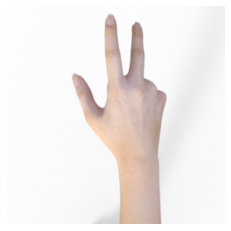

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [9]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = filepath + 'rps/'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = filepath + 'rps-test-set/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=25, 
                              validation_data = validation_generator, 
                              verbose = 1)

model.save("rps.h5")

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


#### Reload Saved Model

In [11]:
filename = "04_rock_p_s_model"
saved_model_filename = "G:\\My Drive\\ColabModels\\" + filename
saved_model_filename

'G:\\My Drive\\ColabModels\\04_rock_p_s_model'

In [12]:
new_model = tf.keras.models.load_model(saved_model_filename)
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
loss, acc = new_model.evaluate(validation_generator, verbose=2)
print(f'Restored model, accuracy: {100 * acc}')

12/12 - 3s - loss: 0.1751 - accuracy: 0.9032
Restored model, accuracy: 90.32257795333862


#### Find Class Labels

In [16]:
# optional
def find_class_labels(data_gen):
    data_gen.class_indices
    dataset_labels = sorted(data_gen.class_indices.items(),
                        key=lambda pair:pair[1])
    dataset_labels = np.array([key.title() for key, value in dataset_labels])
    return dataset_labels

In [ ]:
 # any one will work

In [19]:
dataset_labels = find_class_labels(validation_generator)

In [23]:
dataset_labels = find_class_labels(train_generator)

In [21]:
dataset_labels = ['Paper','Rock', 'Scissors']

In [24]:
dataset_labels

array(['Paper', 'Rock', 'Scissors'], dtype='<U8')

#### Prediction on validation batch

In [152]:
# Get data as a batch - batch has image and label size 100
val_image_batch, val_label_batch = next(iter(validation_generator))

In [30]:
print("Validation batch shape:", val_image_batch.shape)
print("Validation batch shape:", val_label_batch.shape)

Validation batch shape: (32, 150, 150, 3)
Validation batch shape: (32, 3)


In [ ]:
# batch label : cat or dog
# val_label_batch

##### Predict

In [153]:
model_predictions = new_model.predict(val_image_batch)

In [154]:
pred_df = pd.DataFrame(model_predictions)
pred_df.columns = dataset_labels
print("Prediction results for the first elements")
pred_df.head(10)

Prediction results for the first elements


,Paper,Rock,Scissors
0,5.247348e-01,0.064083,4.111826e-01
1,2.177285e-01,0.139901,6.423710e-01
2,3.043867e-01,0.080342,6.152714e-01
3,3.849562e-01,0.114881,5.001632e-01
4,4.678341e-07,0.999999,1.165221e-07
5,9.777972e-01,0.000267,2.193588e-02
6,4.694744e-07,0.999999,1.220558e-07
7,2.698692e-08,1.000000,5.061647e-09
8,4.477935e-04,0.018662,9.808900e-01
9,3.695134e-03,0.000555,9.957500e-01


#### Misclassified Examples

In [155]:
predicted_label_ids = np.argmax(model_predictions, axis=-1)

In [145]:
n = 8 
print(val_label_batch[n])
a = int(np.argmax(val_label_batch[n]))
p = np.argmax(predicted_label_ids[n])
print(f"actual    : {a} -> {dataset_labels[a]}")
print(f"predicted : {p} -> {dataset_labels[p]}")


[0. 0. 1.]
actual    : 2 -> Scissors
predicted : 0 -> Paper


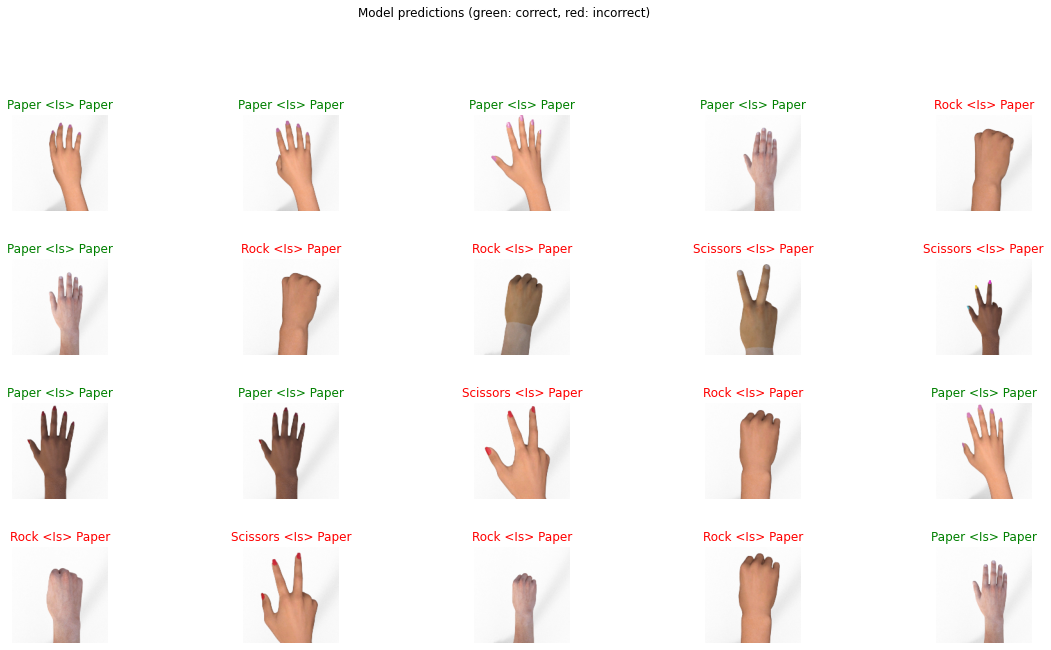

In [156]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.5)
for n in range(20):
    a = int(np.argmax(val_label_batch[n]))
    p = np.argmax(predicted_label_ids[n])
    #if (int(np.argmax(predicted_label_ids[n])) == int(np.argmax(val_label_batch[n]))) :
    if (p == a) :
        color = 'green'
    else:
        color = 'red'
    plt.subplot(6,5,n+1)
    plt.imshow(val_image_batch[n])
    plt.title(f"{dataset_labels[a]} <is> {dataset_labels[p]}".title(), color=color)
    plt.axis('off')
    _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

#### Reports

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)